# Experiments with dim reduction

In [117]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from sklearn import decomposition
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.

In [118]:
df.head()

City  cityID  clusterID            Typology        Country  \
284  Baltimore(MD)     285          7         Auto Sprawl  United States   
9        Melbourne      10          8     Auto Innovative      Australia   
185         Niamey     186          1  Congested Emerging          Niger   
327          Hanoi     328         12  MetroBike Emerging        Vietnam   
66          Urumqi      67         12  MetroBike Emerging          China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
284               85.0                           6.1                   0.3   
9                 80.0                          14.0                     2   
185                NaN                           9.0                     2   
327                8.0                          10.0                     2   
66                21.7                          54.7                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
284                    2.6                             0.66   
9                      4.0                             1.11   
185                   60.0                             1.02   
327                    NaN                             0.90   
66                     NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
284                          8.5                24.9   
9                            5.4                 0.0   
185                         26.4                 0.0   
327                         24.5                 0.0   
66                          18.8                 0.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
284                        0.013409                              0.615385   
9                          0.000000                              0.000000   
185                        0.000000                              0.000000   
327                        0.000000                              0.000000   
66                         0.000000                              0.000000   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
284                     6.417582                  34              0.0   
9                       0.000000                   0              0.0   
185                     0.000000                   0              0.0   
327                     0.000000                   0             14.5   
66                      0.000000                   0             66.0   

     BRT System Length Density (per km)  \
284                            0.000000   
9                              0.000000   
185                            0.000000   
327                                 NaN   
66                             0.134146   

     BRT Stations per Hundred Thousand Persons  \
284                                   0.000000   
9                                     0.000000   
185                                   0.000000   
327                                   0.143000   
66                                    2.537764   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
284                                0.000000                         0.000000   
9                                  0.000000                         0.000000   
185                                0.000000                         0.000000   
327                                     NaN                         0.149000   
66                                 9.123867                        34.441088   

     BRT Age (years) Bikeshare Stations  \
284              0.0                 50   
9                0.0                 50   
185              0.0                  0   
327              1.0                  0   
66               7.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
284                                         2.197802   
9                                           1.264223   
18

In [4]:
df.head()

City  clusterID            Typology        Country  \
cityID                                                                
285     Baltimore(MD)          7         Auto Sprawl  United States   
10          Melbourne          8     Auto Innovative      Australia   
186            Niamey          1  Congested Emerging          Niger   
328             Hanoi         12  MetroBike Emerging        Vietnam   
67             Urumqi         12  MetroBike Emerging          China   

        Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
cityID                                                                          
285                  85.0                           6.1                   0.3   
10                   80.0                          14.0                     2   
186                   NaN                           9.0                     2   
328                   8.0                          10.0                     2   
67                   21.7                          54.7                   NaN   

        Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
cityID                                                           
285                       2.6                             0.66   
10                        4.0                             1.11   
186                      60.0                             1.02   
328                       NaN                             0.90   
67                        NaN                             1.16   

        Road Deaths Rate (per 1000)  Subway Length (km)  \
cityID                                                    
285                             8.5                24.9   
10                              5.4                 0.0   
186                            26.4                 0.0   
328                            24.5                 0.0   
67                             18.8                 0.0   

        Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
cityID                                                                         
285                           0.013409                              0.615385   
10                            0.000000                              0.000000   
186                           0.000000                              0.000000   
328                           0.000000                              0.000000   
67                            0.000000                              0.000000   

        Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
cityID                                                                     
285                        6.417582                  34              0.0   
10                         0.000000                   0              0.0   
186                        0.000000                   0              0.0   
328                        0.000000                   0             14.5   
67                         0.000000                   0             66.0   

        BRT System Length Density (per km)  \
cityID                                       
285                               0.000000   
10                                0.000000   
186                               0.000000   
328                                    NaN   
67                                0.134146   

        BRT Stations per Hundred Thousand Persons  \
cityID                                              
285                                      0.000000   
10                                       0.000000   
186                                      0.000000   
328                                      0.143000   
67                                       2.537764   

        BRT Fleet per Hundred Thousand Persons  \
cityID                                           
285                                   0.000000   
10                                    0.000000   
186                                   0.000000   
328                                

In [10]:
df.tail()

City  clusterID            Typology       Country  \
cityID                                                           
226        Durban          2   BusTransit Sprawl  South Africa   
104        Kumasi          1  Congested Emerging         Ghana   
251         Izmir          5     Hybrid Moderate        Turkey   
250        Ankara          6        Hybrid Giant        Turkey   
225     Cape Town          2   BusTransit Sprawl  South Africa   

        Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
cityID                                                                          
226                   NaN                           NaN                   NaN   
104                   NaN                           NaN                   NaN   
251                   NaN                           NaN                   NaN   
250                   NaN                           NaN                   NaN   
225                  47.7                          35.0                     1   

        Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
cityID                                                           
226                       NaN                             1.19   
104                       NaN                             1.05   
251                       NaN                             1.47   
250                       NaN                             1.48   
225                      12.2                             1.16   

        Road Deaths Rate (per 1000)  Subway Length (km)  \
cityID                                                    
226                            25.1                 0.0   
104                            26.2                 0.0   
251                             8.3                 0.0   
250                             7.5                64.3   
225                            25.1                 0.0   

        Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
cityID                                                                         
226                           0.000000                              0.000000   
104                           0.000000                              0.000000   
251                           0.000000                              0.000000   
250                           0.097424                              1.056034   
225                           0.000000                              0.000000   

        Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
cityID                                                                     
226                        0.000000                   0              0.0   
104                        0.000000                   0              0.0   
251                        0.000000                   0              0.0   
250                       22.435345                  20              0.0   
225                        0.000000                   0             17.0   

        BRT System Length Density (per km)  \
cityID                                       
226                               0.000000   
104                               0.000000   
251                               0.000000   
250                               0.000000   
225                               0.020833   

        BRT Stations per Hundred Thousand Persons  \
cityID                                              
226                                      0.000000   
104                                      0.000000   
251                                      0.000000   
250                                      0.000000   
225                                      0.905563   

        BRT Fleet per Hundred Thousand Persons  \
cityID                                           
226                                   0.000000   
104                                   0.000000   
251                                   0.000000   
250                                   0.000000   
225             

In [7]:
corrMatrix = df.corr()

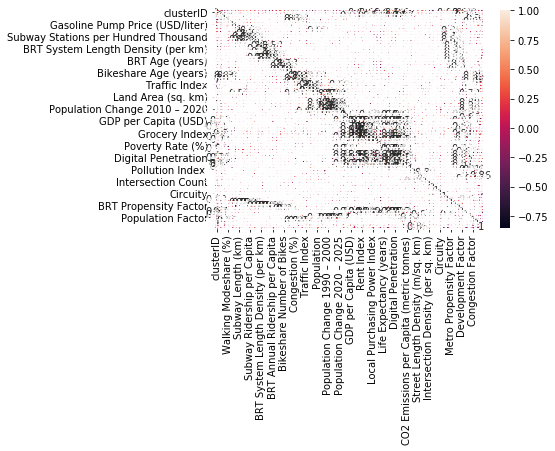

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [119]:
df = df.set_index('cityID') # Remove the indices and use cityID as index.

# Drop unnecessary columns (that explicitly imply each other)
# cityID implies City
# clusterID implies Typology
# Pollution Index is restricted to be used in prediction.
col2drop = ['City', 'Typology', 'Pollution Index ']
# col2drop = ['City', 'Typology']



df.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID, 
# df.drop("Pollution Index", axis=1)
# df.info()
# df["Pollution Index"]

In [120]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
print("Initial dataframe shape [rows, columns]:", df.shape)
n_NaN = df.isna().sum().sum()
print(n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.

Initial dataframe shape [rows, columns]: (331, 74)
3040


In [121]:
df

clusterID                           Country  Car Modeshare (%)  \
cityID                                                                   
285             7                     United States            85.0000   
10              8                         Australia            80.0000   
186             1                             Niger                NaN   
328            12                           Vietnam             8.0000   
67             12                             China            21.7000   
297             7                     United States            88.6000   
90              9                            France            12.0000   
322             5                           Uruguay                NaN   
201             5                            Poland            27.0000   
209             2                            Russia                NaN   
120             3                             India            54.0000   
199             1                       Philippines                NaN   
29              1                       Ivory Coast                NaN   
301             7                     United States            86.8000   
32              1                          Cameroon                NaN   
113             3                             India            19.0000   
68             12                             China            42.0000   
258             7              United Arab Emirates            50.0000   
269             8                     United States            78.0000   
63             12                             China                NaN   
327            12                           Vietnam            11.0000   
256             6                           Ukraine                NaN   
185             1                         Nicaragua                NaN   
181             1                             Nepal                NaN   
14              3                        Bangladesh                NaN   
191             3                          Pakistan            48.0000   
264            10                    United Kingdom            68.0700   
5               1                            Angola                NaN   
20              2                           Bolivia                NaN   
93             10                            France            57.0000   
133             2                              Iraq                NaN   
177             1                           Morocco             9.0000   
47             11                             China            20.6000   
101            10                           Germany            43.0000   
2               1                           Algeria            12.8000   
117             3                             India            25.0000   
153             1                             Kenya             0.0000   
235            10                             Spain            30.0000   
233             7                       South Korea                NaN   
162             2                          Malaysia                NaN   
273             8                     United States            86.8000   
211             2                            Russia                NaN   
33              8                            Canada            64.5000   
89             10                           Finland            21.0000   
252             6                            Turkey                NaN   
268             8                     United States            84.7000   
135            10                           Ireland            64.0000   
173             4                            Mexico                NaN   
223             1                           Somalia                NaN   
210             2                            Russia                NaN   
195             4                              Peru            12.0000   
308             7                     United States            90.5000   
126         

In [100]:
#Make dataframe for transportation related variables only, leaving density variables because high correlation
#Find if there is a relationship between bikes, cars and public transport

In [430]:
dftransport = df[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)','Subway Length (km)','Subway Ridership per Capita','Subway Age (years)','BRT Length (km)','BRT Annual Ridership per Capita','BRT Age (years)','Bikeshare Stations','Bikeshare Number of Bikes','Bikeshare Age (years)','Congestion (%)']]


In [431]:
dftransport

Car Modeshare (%)  Public Transit Modeshare (%)  \
cityID                                                    
285               85.0000                        6.1000   
10                80.0000                       14.0000   
186                   NaN                        9.0000   
328                8.0000                       10.0000   
67                21.7000                       54.7000   
297               88.6000                        3.6000   
90                12.0000                       33.0000   
322                   NaN                           NaN   
201               27.0000                       46.0000   
209                   NaN                           NaN   
120               54.0000                       12.0000   
199                   NaN                           NaN   
29                    NaN                           NaN   
301               86.8000                        2.6000   
32                    NaN                           NaN   
113               19.0000                       42.0000   
68                42.0000                       24.6000   
258               50.0000                        1.0000   
269               78.0000                       12.0000   
63                    NaN                       43.0000   
327               11.0000                        6.0000   
256                   NaN                           NaN   
185                   NaN                           NaN   
181                   NaN                           NaN   
14                    NaN                           NaN   
191               48.0000                       52.0000   
264               68.0700                       21.1000   
5                     NaN                           NaN   
20                    NaN                           NaN   
93                57.0000                       10.0000   
133                   NaN                           NaN   
177                9.0000                       20.0000   
47                20.6000                       32.6000   
101               43.0000                       21.0000   
2                 12.8000                       28.7000   
117               25.0000                       35.0000   
153                0.0000                       36.0000   
235               30.0000                       18.0000   
233                   NaN                           NaN   
162                   NaN                           NaN   
273               86.8000                        3.1000   
211                   NaN                           NaN   
33                64.5000                       23.3000   
89                21.0000                       34.0000   
252                   NaN                           NaN   
268               84.7000                        5.1000   
135               64.0000                       13.0000   
173                   NaN                       67.2000   
223                   NaN                           NaN   
210                   NaN                           NaN   
195               12.0000                       62.0000   
308               90.5000                        1.4000   
126                   NaN                           NaN   
310               86.9000                        2.6000   
51                11.0000                       15.0000   
159                   NaN                           NaN   
99                42.0000                       18.0000   
289               89.3000                        3.7000   
174               63.4000                       14.4000   
76                    NaN                           NaN   
275               74.1000                       13.1000   
180                   NaN                           NaN   
249               14.0000                       41.0000   
139               54.0000                       29.0000   
98                31.0000                       26.0000   
42                20.0000                       24.0000

In [432]:
from sklearn import decomposition

In [433]:
pca=decomposition.PCA()

In [434]:
pca.fit(dftransport)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [106]:
pca_new.explained_variance_ratio_

array([9.99464571e-01, 3.47206270e-04])

In [107]:
pca_new=decomposition.PCA(n_components=2)
pca_new.fit(dftransport)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
X_reduced=pca_new.transform(dftransport)

In [109]:
X_reduced.shape

(331, 2)

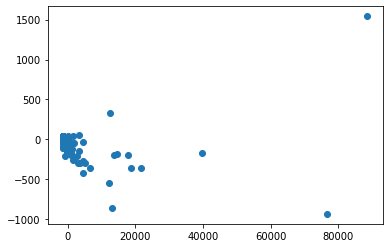

In [110]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1]);

After applying 2 dimensional PCA we can see one big cluster with 11 outlier points. This cannot tells us much. By instepcting dataframe it seems, that car modeshare outweight the other variables. We can check this assumption by removing it from the dataframe and lets see what will happen.

In [111]:
#2D PCA with car modeshare removed

In [112]:
dftransport2 = df[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)','Subway Length (km)','Subway Ridership per Capita','Subway Age (years)','BRT Length (km)','BRT Annual Ridership per Capita','BRT Age (years)','Bikeshare Stations','Bikeshare Number of Bikes','Congestion (%)']]


In [113]:
pca2=decomposition.PCA(n_components=2)
pca2.fit(dftransport2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
X_reduced2=pca2.transform(dftransport2)

In [115]:
X_reduced2.shape

(331, 2)

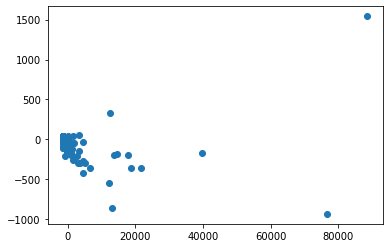

In [116]:
plt.scatter(X_reduced2[:, 0], X_reduced2[:,1]);

In [117]:
pca2.explained_variance_ratio_

array([9.99464769e-01, 3.47188762e-04])

The scatter plot did not change, however we got  slightly better explanation for x dimension and lower explanation for y dimension. The method did not tell us much so Lets try Muldidimensional scaling.

In [130]:
from sklearn.manifold import MDS

In [131]:
mds=MDS()

In [132]:
mds.fit(dftransport)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [133]:
mds.embedding_

array([[-1.70914814e+01, -1.36600399e+03],
       [-8.60531530e+00, -7.90012154e+02],
       [-9.90711410e+01, -1.40254168e+03],
       [-9.78444272e+01, -1.39731862e+03],
       [-1.62991934e+02, -1.39787564e+03],
       [-3.07458155e+01, -1.18972841e+03],
       [ 8.55519541e+02,  1.31392533e+04],
       [-1.02626654e+02, -1.40348252e+03],
       [-6.43055047e+01, -1.15639236e+03],
       [-1.27336516e+02, -1.37263403e+03],
       [-6.04649190e+01, -1.39548613e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-2.39909206e+01, -1.01363283e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-2.86805215e+02, -1.32468354e+03],
       [-7.53580679e+01, -1.38261115e+03],
       [-2.31841930e+01, -1.41818532e+03],
       [ 1.12170647e+03,  4.31790062e+03],
       [ 3.62496927e+01, -1.41828117e+03],
       [-9.48471889e+01, -1.40243638e+03],
       [-2.32542208e+02, -1.36246251e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-9.

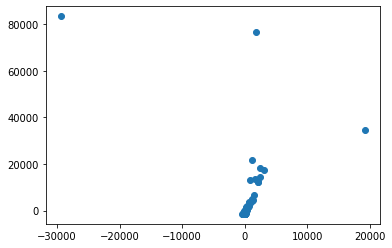

In [134]:
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1])

Compared with previously done PCA, there are now 2 visible clusters  with 3 outlier points. The [0;0] centered cluster is the most densed. Although it does not have specific interpretation, based on the variables chosen for decomposition, we can guess that these points are cities with car share dominance as these type of city represents majority in the dataset. The next cluster located above at point [0;20000] can be cities with BRT and subway dominant modeshare. The outlier points can represent cities with significant usage of bicycle mode of transport.

In [97]:
# lets try PCA for number of componenets 3

In [98]:
pca_n3=decomposition.PCA(n_components=3)
pca_n3.fit(dftransport)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_reduced3=pca_n3.transform(dftransport)

In [21]:
X_reduced3.shape

(331, 3)

In [23]:
pca_n3.explained_variance_ratio_

array([9.99464769e-01, 3.47188762e-04, 1.16670492e-04])

By observig explained variance ratio it seems that adding another dimension did not provide significant improvement. However, the results are very affected by a large amounts of zero values. Lets try to form a different dataset with lower amount of selected variables zero values and do dimension reduction once more.

In [146]:
#Select density type variables
dftransport3=df[['Subway Length Density (per km)','BRT System Length Density (per km)','Network Density Factor','Population Density (per sq. km)','Street Length Density (m/sq. km)','Intersection Density (per sq. km)','Highway Proportion','Congestion Factor']]

In [147]:
pca_density=decomposition.PCA(n_components=2)
pca_density.fit(dftransport3)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [148]:
X_density=pca_density.transform(dftransport3)

In [149]:
X_density.shape

(331, 2)

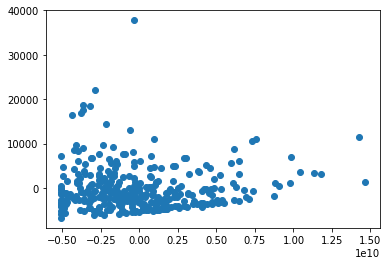

In [150]:
plt.scatter(X_density[:, 0], X_density[:,1]);

In [145]:
pca_density.explained_variance_ratio_

array([1.00000000e+00, 1.98668107e-12])

There is no vissible pattern on the figure. Lets try MDS

In [155]:
mds2=MDS()

In [156]:
mds2.fit(dftransport3)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [172]:
mds2.embedding_

array([[-1.18243824e+09,  2.21614749e+09],
       [-1.58787233e+09,  3.18513687e+09],
       [ 6.51935935e+08, -1.46093959e+09],
       [ 1.70983625e+09, -3.54922869e+09],
       [ 2.20518907e+09, -4.35098348e+09],
       [-2.04992658e+09,  4.23414456e+09],
       [-3.66627442e+09,  9.03962359e+09],
       [ 2.53856483e+08, -6.35019000e+08],
       [ 1.19729933e+08, -3.64738875e+08],
       [ 1.09369733e+09, -2.37718775e+09],
       [ 9.96650100e+07, -3.42241074e+08],
       [ 2.23681763e+09, -4.44211436e+09],
       [ 1.52432144e+09, -3.20667748e+09],
       [-1.66102614e+08,  1.87352774e+08],
       [ 1.35331855e+09, -2.84816184e+09],
       [-1.38233037e+09,  2.69103738e+09],
       [ 4.24687910e+08, -1.01138116e+09],
       [ 1.66665837e+09, -3.48251977e+09],
       [-1.54823830e+09,  3.11851413e+09],
       [ 1.37101923e+09, -2.89876852e+09],
       [ 1.45007002e+09, -3.07998928e+09],
       [ 3.26391036e+08, -8.12617068e+08],
       [ 1.19231037e+09, -2.58522103e+09],
       [-2.

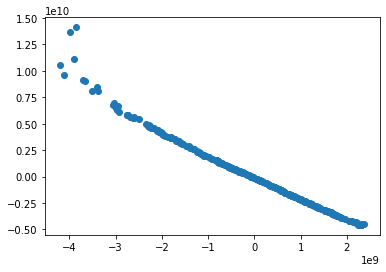

In [173]:
plt.scatter(mds2.embedding_[:,0], mds2.embedding_[:,1])

Now lets add some socioeconomic variables like ('Gasoline Pump Price (USD/liter)','GDP per Capita (USD)') and see what will happen

In [200]:
dftransport4=df[['Gasoline Pump Price (USD/liter)','GDP per Capita (USD)','Subway Length Density (per km)','BRT System Length Density (per km)','Network Density Factor','Population Density (per sq. km)','Street Length Density (m/sq. km)','Intersection Density (per sq. km)','Highway Proportion','Congestion Factor']]

In [201]:
mds3=MDS()

In [202]:
mds3.fit(dftransport4)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [203]:
mds3.embedding_

array([[ 8.79653243e+08, -2.34860246e+09],
       [ 1.22454040e+09, -3.33959695e+09],
       [-5.54286491e+08,  1.50106823e+09],
       [-1.40475363e+09,  3.68178823e+09],
       [-1.79022874e+09,  4.53994498e+09],
       [ 1.61719186e+09, -4.41612381e+09],
       [ 4.02999616e+09, -8.88063955e+09],
       [-2.53603384e+08,  6.34897236e+08],
       [-1.48718887e+08,  3.51998747e+08],
       [-9.16218162e+08,  2.45151552e+09],
       [-1.28685432e+08,  3.28459986e+08],
       [-1.80598009e+09,  4.63608416e+09],
       [-1.27150245e+09,  3.31581319e+09],
       [ 5.31611674e+07, -2.35888753e+08],
       [-1.09032673e+09,  2.96010387e+09],
       [ 1.08725961e+09, -2.82008952e+09],
       [-3.91793785e+08,  1.02419606e+09],
       [-1.37623465e+09,  3.60812581e+09],
       [ 1.21597639e+09, -3.26048913e+09],
       [-1.12241735e+09,  3.00475982e+09],
       [-1.22162829e+09,  3.17795263e+09],
       [-3.01376997e+08,  8.21261348e+08],
       [-1.00443736e+09,  2.66418176e+09],
       [ 2.

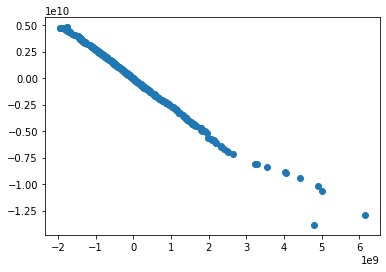

In [204]:
plt.scatter(mds3.embedding_[:,0], mds3.embedding_[:,1])

When applied MDS, Density related variables has created almost continuous decreasing line. That is very hardly interpretable, as we are looking more for clusters

It seems that applying dimension reduction methods on tranport related variables does not lead anywhere as no significant trends or patterns were observed.

# Congestion Prediction

Next thing we would like to try is to predict congestion - either by percentage congestion variable or congestion factor. We would like to find out if there is some relationship between congestions and weather, for example if the cities in hot climate are more likely to be congested. The plan is following - We will use dataset from https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities which contains temperature observation of major cities. Choose one day to get one temperature measurement, pair it with the cities dataset and then apply Gaussian mixture model. The missing observations for temperature will be either imputed or find in another dataset.

In [383]:
#we will nedd the city column again
dfcity = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 

In [384]:
dftemp =pd.read_csv('city_temperature.csv', index_col=0, skipinitialspace=True) # Read with excel index. 

C:\Users\vilem\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [385]:
dftemp.head(15)

Country State     City  Month  Day  Year  AvgTemperature
Region                                                          
Africa  Algeria   NaN  Algiers      1    1  1995            64.2
Africa  Algeria   NaN  Algiers      1    2  1995            49.4
Africa  Algeria   NaN  Algiers      1    3  1995            48.8
Africa  Algeria   NaN  Algiers      1    4  1995            46.4
Africa  Algeria   NaN  Algiers      1    5  1995            47.9
Africa  Algeria   NaN  Algiers      1    6  1995            48.7
Africa  Algeria   NaN  Algiers      1    7  1995            48.9
Africa  Algeria   NaN  Algiers      1    8  1995            49.1
Africa  Algeria   NaN  Algiers      1    9  1995            49.0
Africa  Algeria   NaN  Algiers      1   10  1995            51.9
Africa  Algeria   NaN  Algiers      1   11  1995            51.7
Africa  Algeria   NaN  Algiers      1   12  1995            51.3
Africa  Algeria   NaN  Algiers      1   13  1995            47.0
Africa  Algeria   NaN  Algiers      1   14  1995            46.9
Africa  Algeria   NaN  Algiers      1   15  1995            47.5

In [386]:
#dropping unneccesary columns
col2drop = ['Country', 'State']

dftemp.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID, 

In [387]:
#Before merging with our dataset its neccessary to choose only one day
new_dftemp = dftemp.loc[(dftemp['Month'] == 11) & (dftemp['Day'] == 16) & (dftemp['Year'] == 2019)]

In [388]:
df_new=pd.merge(dfcity, new_dftemp, on='City', how='outer')

In [441]:
df_new

City  cityID  clusterID                 Typology  \
0                 Baltimore(MD)   285.0        7.0              Auto Sprawl   
1                     Melbourne    10.0        8.0          Auto Innovative   
2                        Niamey   186.0        1.0       Congested Emerging   
3                         Hanoi   328.0       12.0       MetroBike Emerging   
4                        Urumqi    67.0       12.0       MetroBike Emerging   
5                 Milwaukee(WI)   297.0        7.0              Auto Sprawl   
6                         Paris    90.0        9.0  MassTransit Heavyweight   
7                    Montevideo   322.0        5.0          Hybrid Moderate   
8                        Krakow   201.0        5.0          Hybrid Moderate   
9                 Yekaterinburg   209.0        2.0        BusTransit Sprawl   
10                         Pune   120.0        3.0         Congested Boomer   
11                         Cebu   199.0        1.0       Congested Emerging   
12                      Abidjan    29.0        1.0       Congested Emerging   
13                   Austin(TX)   301.0        7.0              Auto Sprawl   
14                      Yaounde    32.0        1.0       Congested Emerging   
15                        Delhi   113.0        3.0         Congested Boomer   
16                        Hefei    68.0       12.0       MetroBike Emerging   
17                        Dubai   258.0        7.0              Auto Sprawl   
18                  Chicago(IL)   269.0        8.0          Auto Innovative   
19                       Dalian    63.0       12.0       MetroBike Emerging   
20             Ho Chi Minh City   327.0       12.0       MetroBike Emerging   
21                      Kharkiv   256.0        6.0             Hybrid Giant   
22                      Managua   185.0        1.0       Congested Emerging   
23                    Kathmandu   181.0        1.0       Congested Emerging   
24                   Chittagong    14.0        3.0         Congested Boomer   
25                      Karachi   191.0        3.0         Congested Boomer   
26                      Glasgow   264.0       10.0     MassTransit Moderate   
27                       Huambo     5.0        1.0       Congested Emerging   
28                   Santa Cruz    20.0        2.0        BusTransit Sprawl   
29                        Lille    93.0       10.0     MassTransit Moderate   
30                      Baghdad   133.0        2.0        BusTransit Sprawl   
31                        Rabat   177.0        1.0       Congested Emerging   
32                    Chongqing    47.0       11.0          MetroBike Giant   
33                 Cologne-Bonn   101.0       10.0     MassTransit Moderate   
34                      Algiers     2.0        1.0       Congested Emerging   
35                    Bangalore   117.0        3.0         Congested Boomer   
36                      Mombasa   153.0        1.0       Congested Emerging   
37                    Barcelona   235.0       10.0     MassTransit Moderate   
38                        Ulsan   233.0        7.0              Auto Sprawl   
39                  Johor Bahru   162.0        2.0        BusTransit Sprawl   
40                  Atlanta(GA)   273.0        8.0          Auto Innovative   
41                       Samara   211.0        2.0        BusTransit Sprawl   
42                      Toronto    33.0        8.0          Auto Innovative   
43                     Helsinki    89.0       10.0     MassTransit Moderate   
44                        Bursa   252.0        6.0             Hybrid Giant   
45              Los Angeles(CA)   268.0        8.0          Auto Innovative   
46                       Dublin   135.0       10.0     MassTransit Moderate   
47                     Acapulco   173.0        4.0         BusTransit Dense   
48                    Mogadishu   223.0        1.0       Congested Emerging   
49              Nizhny Novgorod   210.0        2.0        BusTransit Sprawl  

In [390]:
df_new = df_new[df_new['Country'].notna()]
df_new

City  cityID  clusterID                 Typology  \
0                 Baltimore(MD)   285.0        7.0              Auto Sprawl   
1                     Melbourne    10.0        8.0          Auto Innovative   
2                        Niamey   186.0        1.0       Congested Emerging   
3                         Hanoi   328.0       12.0       MetroBike Emerging   
4                        Urumqi    67.0       12.0       MetroBike Emerging   
5                 Milwaukee(WI)   297.0        7.0              Auto Sprawl   
6                         Paris    90.0        9.0  MassTransit Heavyweight   
7                    Montevideo   322.0        5.0          Hybrid Moderate   
8                        Krakow   201.0        5.0          Hybrid Moderate   
9                 Yekaterinburg   209.0        2.0        BusTransit Sprawl   
10                         Pune   120.0        3.0         Congested Boomer   
11                         Cebu   199.0        1.0       Congested Emerging   
12                      Abidjan    29.0        1.0       Congested Emerging   
13                   Austin(TX)   301.0        7.0              Auto Sprawl   
14                      Yaounde    32.0        1.0       Congested Emerging   
15                        Delhi   113.0        3.0         Congested Boomer   
16                        Hefei    68.0       12.0       MetroBike Emerging   
17                        Dubai   258.0        7.0              Auto Sprawl   
18                  Chicago(IL)   269.0        8.0          Auto Innovative   
19                       Dalian    63.0       12.0       MetroBike Emerging   
20             Ho Chi Minh City   327.0       12.0       MetroBike Emerging   
21                      Kharkiv   256.0        6.0             Hybrid Giant   
22                      Managua   185.0        1.0       Congested Emerging   
23                    Kathmandu   181.0        1.0       Congested Emerging   
24                   Chittagong    14.0        3.0         Congested Boomer   
25                      Karachi   191.0        3.0         Congested Boomer   
26                      Glasgow   264.0       10.0     MassTransit Moderate   
27                       Huambo     5.0        1.0       Congested Emerging   
28                   Santa Cruz    20.0        2.0        BusTransit Sprawl   
29                        Lille    93.0       10.0     MassTransit Moderate   
30                      Baghdad   133.0        2.0        BusTransit Sprawl   
31                        Rabat   177.0        1.0       Congested Emerging   
32                    Chongqing    47.0       11.0          MetroBike Giant   
33                 Cologne-Bonn   101.0       10.0     MassTransit Moderate   
34                      Algiers     2.0        1.0       Congested Emerging   
35                    Bangalore   117.0        3.0         Congested Boomer   
36                      Mombasa   153.0        1.0       Congested Emerging   
37                    Barcelona   235.0       10.0     MassTransit Moderate   
38                        Ulsan   233.0        7.0              Auto Sprawl   
39                  Johor Bahru   162.0        2.0        BusTransit Sprawl   
40                  Atlanta(GA)   273.0        8.0          Auto Innovative   
41                       Samara   211.0        2.0        BusTransit Sprawl   
42                      Toronto    33.0        8.0          Auto Innovative   
43                     Helsinki    89.0       10.0     MassTransit Moderate   
44                        Bursa   252.0        6.0             Hybrid Giant   
45              Los Angeles(CA)   268.0        8.0          Auto Innovative   
46                       Dublin   135.0       10.0     MassTransit Moderate   
47                     Acapulco   173.0        4.0         BusTransit Dense   
48                    Mogadishu   223.0        1.0       Congested Emerging   
49              Nizhny Novgorod   210.0        2.0        BusTransit Sprawl  

# Imputing transport modal shares

In [392]:
df_new.loc[(df_new['Country'] == 'Russia')]

City  cityID  clusterID           Typology Country  \
9      Yekaterinburg   209.0        2.0  BusTransit Sprawl  Russia   
41            Samara   211.0        2.0  BusTransit Sprawl  Russia   
49   Nizhny Novgorod   210.0        2.0  BusTransit Sprawl  Russia   
231   St. Petersburg   207.0        2.0  BusTransit Sprawl  Russia   
271      Novosibirsk   208.0        2.0  BusTransit Sprawl  Russia   
292           Moscow   206.0        2.0  BusTransit Sprawl  Russia   
317            Kazan   212.0        2.0  BusTransit Sprawl  Russia   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
9                  NaN                           NaN                   NaN   
41                 NaN                           NaN                   NaN   
49                 NaN                           NaN                   NaN   
231                NaN                           NaN                   NaN   
271                NaN                           NaN                   NaN   
292               26.0                          49.0                   NaN   
317               33.0                          67.0                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
9                      NaN                             0.73   
41                     NaN                             0.71   
49                     NaN                             0.71   
231                    NaN                             0.72   
271                    NaN                             0.70   
292                   24.0                             0.73   
317                    NaN                             0.73   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
9                           18.9                12.7   
41                          18.9                12.7   
49                          18.9                18.8   
231                         18.9               113.2   
271                         18.9                15.9   
292                          7.0               338.8   
317                         18.9                15.8   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
9                          0.024517                              0.659341   
41                         0.051626                              0.873362   
49                         0.030225                              1.176471   
231                        0.084039                              1.303502   
271                        0.025563                              0.872483   
292                        0.063804                              1.225106   
317                        0.035909                              0.873362   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
9                      38.021978                26.0              0.0   
41                     13.624454                30.0              0.0   
49                     31.260504                32.0              0.0   
231                   148.463035                62.0              0.0   
271                    58.859060                31.0              0.0   
292                   147.917924                82.0              0.0   
317                    25.502183                12.0              0.0   

     BRT System Length Density (per km)  \
9                                   0.0   
41                                  0.0   
49                                  0.0   
231                                 0.0   
271                                 0.0   
292                                 0.0   
317                                 0.0   

     BRT Stations per Hundred Thousand Persons  \
9                                          0.0   
41                                         0.0   
49                                         0.0   
231                                        0.0   
271                                        0.0   
292                          

All Russian cities are in same typology category with predominant public transpor
Based on statistics of Saint Petersburg modeshares https://cyberleninka.ru/article/n/analiz-transportnoy-sistemy-sankt-peterburga-i-vozmozhnosti-povysheniya-v-ney-roli-prigorodnyh-zheleznyh-dorog/viewer
And Moscow Modeshares
https://megaobuchalka.ru/12/6677.html
Modeshares for other Russian cities will be imputed as average of available observations.

In [393]:
#First lets impute Saint Petersburg modeshares to other Russian cities
indices = [9,41,49,231,271,317]
df_new.at[292,['Bicycle Modeshare (%)']]=np.array([0])
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([34, 64, 1,1])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [394]:
df_china=df_new.loc[(df_new['Country'] == 'China')]
df_china

City  cityID  clusterID            Typology Country  \
4          Urumqi    67.0       12.0  MetroBike Emerging   China   
16          Hefei    68.0       12.0  MetroBike Emerging   China   
19         Dalian    63.0       12.0  MetroBike Emerging   China   
32      Chongqing    47.0       11.0     MetroBike Giant   China   
54        Chengdu    51.0       12.0  MetroBike Emerging   China   
77          Wuhan    48.0       12.0  MetroBike Emerging   China   
78       Changsha    66.0       12.0  MetroBike Emerging   China   
83          Jinan    60.0       12.0  MetroBike Emerging   China   
85       Shenzhen    46.0       11.0     MetroBike Giant   China   
89      Guangzhou    45.0       11.0     MetroBike Giant   China   
125        Harbin    53.0       12.0  MetroBike Emerging   China   
130      Shenyang    54.0       12.0  MetroBike Emerging   China   
148        Xiamen    71.0       12.0  MetroBike Emerging   China   
150       Beijing    44.0       11.0     MetroBike Giant   China   
152     Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155       Taiyuan    61.0       12.0  MetroBike Emerging   China   
167  Shijiazhuang    70.0       12.0  MetroBike Emerging   China   
183      Hangzhou    55.0       12.0  MetroBike Emerging   China   
187        Fuzhou    69.0       12.0  MetroBike Emerging   China   
194       Qingdao    58.0       12.0  MetroBike Emerging   China   
213       Kunming    62.0       12.0  MetroBike Emerging   China   
222       Tianjin    49.0       12.0  MetroBike Emerging   China   
250     Changchun    59.0       12.0  MetroBike Emerging   China   
272       Nanjing    52.0       12.0  MetroBike Emerging   China   
273        Suzhou    64.0       12.0  MetroBike Emerging   China   
293       Xi‚Äôan    56.0       12.0  MetroBike Emerging   China   
299      Shanghai    43.0       11.0     MetroBike Giant   China   
304      Dongguan    50.0       12.0  MetroBike Emerging   China   
311        Ningbo    72.0       12.0  MetroBike Emerging   China   
322          Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
4                21.70                         54.70                   NaN   
16               42.00                         24.60                   2.7   
19                 NaN                         43.00                   NaN   
32               20.60                         32.60                   NaN   
54               11.00                         15.00                   NaN   
77                 NaN                           NaN                   NaN   
78                 NaN                           NaN                   3.2   
83                 NaN                           NaN                   NaN   
85               19.30                         16.70                   6.2   
89               21.00                         32.00                     9   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
150              21.00                         26.00                    32   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
167               5.00                          7.16                 47.28   
183                NaN                           NaN                   NaN   
187                NaN                           NaN                    37   
194                NaN                           NaN                   NaN   
213              22.10                         25.20                  55.3   
222              27.80                         42.00                 13.85   
250              20.00                         33.00                    10   
272                NaN          

According to arcitcle https://www.intechopen.com/online-first/the-rise-and-decline-of-car-use-in-beijing-and-shanghai car traffic growth in two major Chinese cities , Beijing and Shangai, has already reached its peak values. Because majority of available modalshares are in similar ranges ( for cars around 20%), it seems reasonable to impute modalshares as mean value of Chinese cities.

In [395]:
#This does not work well as sum of modal shares is over 100%
#df_china['Car Modeshare (%)'] = df_china['Car Modeshare (%)'].fillna((df_china['Car Modeshare (%)'].mean()))
#df_china['Public Transit Modeshare (%)'] = df_china['Public Transit Modeshare (%)'].fillna((df_china['Public Transit Modeshare (%)'].mean()))
#df_china['Bicycle Modeshare (%)'] = df_china['Bicycle Modeshare (%)'].fillna((df_china['Bicycle Modeshare (%)'].mean()))
#df_china['Walking Modeshare (%)'] = df_china['Walking Modeshare (%)'].fillna((df_china['Walking Modeshare (%)'].mean()))
#Lets find mean values and then impute manually

In [396]:
#first lets find mean values for modal shares



In [397]:
car =df_new.loc[df_new['Country'] == 'China', 'Car Modeshare (%)'].mean()
car

21.22533333333333

In [398]:
publictransit =df_new.loc[df_new['Country'] == 'China', 'Public Transit Modeshare (%)'].mean()
publictransit

34.20125

In [399]:
bike=df_new.loc[df_new['Country'] == 'China', 'Bicycle Modeshare (%)'].mean()
bike

22.509285714285713

In [400]:
walking = df_new.loc[df_new['Country'] == 'China', 'Walking Modeshare (%)'].mean()
walking

27.345384615384617

In [401]:
pd.DataFrame(df_china[df_china['Car Modeshare (%)'].isna() &df_china['Bicycle Modeshare (%)'].isna() & df_china['Walking Modeshare (%)'].isna() & df_china['Public Transit Modeshare (%)'].isna() ])

City  cityID  clusterID            Typology Country  \
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
77                 NaN                           NaN                   NaN   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
194                NaN                           NaN                   NaN   
273                NaN                           NaN                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
77                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
194                    NaN                             1.16   
273                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
77                          18.8              128.70   
83                          18.8                0.00   
125                         18.8               17.50   
130                         18.8               55.10   
148                         18.8                0.00   
152                         18.8               45.39   
155                         18.8                0.00   
183                         18.8               81.50   
194                         18.8               12.00   
273                         18.8               66.14   
322                         18.8               56.00   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
77                         0.097426                              1.338583   
83                         0.000000                              0.000000   
125                        0.030702                              0.366226   
130                        0.054554                              0.693548   
148                        0.000000                              0.000000   
152                        0.035050                              0.625543   
155                        0.000000                              0.000000   
183                        0.064224                              0.749507   
194                        0.007533                              0.167504   
273                        0.052120                              1.096654   
322            

In [402]:
#imputing rows with nan values

indices = [77,83,125,130,148,152,155,183,194,273,322]
df_new.at[indices,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 34, 22,23])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [403]:
pd.DataFrame(df_china[df_china['Bicycle Modeshare (%)'].isna()])

City  cityID  clusterID            Typology Country  \
4       Urumqi    67.0       12.0  MetroBike Emerging   China   
19      Dalian    63.0       12.0  MetroBike Emerging   China   
32   Chongqing    47.0       11.0     MetroBike Giant   China   
54     Chengdu    51.0       12.0  MetroBike Emerging   China   
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
304   Dongguan    50.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
4                 21.7                          54.7                   NaN   
19                 NaN                          43.0                   NaN   
32                20.6                          32.6                   NaN   
54                11.0                          15.0                   NaN   
77                 NaN                           NaN                   NaN   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
194                NaN                           NaN                   NaN   
273                NaN                           NaN                   NaN   
304               40.0                          60.0                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
4                      NaN                             1.16   
19                     NaN                             1.16   
32                    46.3                             1.18   
54                     NaN                             1.16   
77                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
194                    NaN                             1.16   
273                    NaN                             1.16   
304                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
4                           18.8                0.00   
19                          18.8              141.00   
32                          18.8              201.60   
54                          18.8              108.20   
77                          18.8              128.70   
83                          18.8                0.00   
125                         18.8               17.50   
130                         18.8               55.10   
1

In [404]:
df_new.at[4,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21.7, 54.7, 18,6.6])
df_new.at[32,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([20.6, 32.6, 0.5,46.3])
df_new.at[54,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([11, 15, 44,20])
df_new.at[304,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([40, 60, 0,0])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [405]:
pd.DataFrame(df_china[df_china['Walking Modeshare (%)'].isna()])

City  cityID  clusterID            Typology Country  \
4       Urumqi    67.0       12.0  MetroBike Emerging   China   
16       Hefei    68.0       12.0  MetroBike Emerging   China   
19      Dalian    63.0       12.0  MetroBike Emerging   China   
54     Chengdu    51.0       12.0  MetroBike Emerging   China   
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
78    Changsha    66.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
304   Dongguan    50.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
4                 21.7                          54.7                   NaN   
16                42.0                          24.6                   2.7   
19                 NaN                          43.0                   NaN   
54                11.0                          15.0                   NaN   
77                 NaN                           NaN                   NaN   
78                 NaN                           NaN                   3.2   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
194                NaN                           NaN                   NaN   
273                NaN                           NaN                   NaN   
304               40.0                          60.0                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
4                      NaN                             1.16   
16                     NaN                             1.16   
19                     NaN                             1.16   
54                     NaN                             1.16   
77                     NaN                             1.16   
78                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
194                    NaN                             1.16   
273                    NaN                             1.16   
304                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
4                           18.8                0.00   
16                          18.8               24.60   
19                          18.8              141.00   
54                          18.8              108.20   
77                 

In [406]:
df_new.at[16,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([42, 24.6, 2.7,19.3])


C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [407]:

pd.DataFrame(df_china[df_china['Public Transit Modeshare (%)'].isna()])

City  cityID  clusterID            Typology Country  \
77       Wuhan    48.0       12.0  MetroBike Emerging   China   
78    Changsha    66.0       12.0  MetroBike Emerging   China   
83       Jinan    60.0       12.0  MetroBike Emerging   China   
125     Harbin    53.0       12.0  MetroBike Emerging   China   
130   Shenyang    54.0       12.0  MetroBike Emerging   China   
148     Xiamen    71.0       12.0  MetroBike Emerging   China   
152  Zhengzhou    57.0       12.0  MetroBike Emerging   China   
155    Taiyuan    61.0       12.0  MetroBike Emerging   China   
183   Hangzhou    55.0       12.0  MetroBike Emerging   China   
187     Fuzhou    69.0       12.0  MetroBike Emerging   China   
194    Qingdao    58.0       12.0  MetroBike Emerging   China   
272    Nanjing    52.0       12.0  MetroBike Emerging   China   
273     Suzhou    64.0       12.0  MetroBike Emerging   China   
322       Wuxi    65.0       12.0  MetroBike Emerging   China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
77                 NaN                           NaN                   NaN   
78                 NaN                           NaN                   3.2   
83                 NaN                           NaN                   NaN   
125                NaN                           NaN                   NaN   
130                NaN                           NaN                   NaN   
148                NaN                           NaN                   NaN   
152                NaN                           NaN                   NaN   
155                NaN                           NaN                   NaN   
183                NaN                           NaN                   NaN   
187                NaN                           NaN                    37   
194                NaN                           NaN                   NaN   
272                NaN                           NaN                    39   
273                NaN                           NaN                   NaN   
322                NaN                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
77                     NaN                             1.16   
78                     NaN                             1.16   
83                     NaN                             1.16   
125                    NaN                             1.16   
130                    NaN                             1.16   
148                    NaN                             1.16   
152                    NaN                             1.16   
155                    NaN                             1.16   
183                    NaN                             1.16   
187                   26.0                             1.16   
194                    NaN                             1.16   
272                   20.0                             1.16   
273                    NaN                             1.16   
322                    NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
77                          18.8              128.70   
78                          18.8               50.20   
83                          18.8                0.00   
125                         18.8               17.50   
130                         18.8               55.10   
148                         18.8                0.00   
152                         18.8               45.39   
155                         18.8                0.00   
183                         18.8               81.50   
187                         18.8               24.89   
194                         18.8               12.00   
272                         18.8              224.30   
273                         18.8               66.14   
322                         18.8               56.00   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \

In [408]:
df_new.at[19,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([21, 43, 20,16])
df_new.at[78,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([23.8, 43, 20,3.2])
df_new.at[187,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 23, 37,26])
df_new.at[272,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([17, 24, 39,20])

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


WE can use same methodology to impute modeshares for Indian cities, first lets find mean modal shares

In [409]:
car =df_new.loc[df_new['Country'] == 'India', 'Car Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'India', 'Bicycle Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'India', 'Public Transit Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'India', 'Walking Modeshare (%)'].mean()
modes_india_mean = [car, publictransit, bike, walking] 
print(*modes_india_mean) 

31.875 27.25 9.875 27.375


In [413]:
df_india=df_new.loc[(df_new['Country'] == 'India')]
df_india

City  cityID  clusterID            Typology Country  \
10        Pune   120.0        3.0    Congested Boomer   India   
15       Delhi   113.0        3.0    Congested Boomer   India   
35   Bangalore   117.0        3.0    Congested Boomer   India   
80      Mumbai   114.0        3.0    Congested Boomer   India   
128    Lucknow   122.0        1.0  Congested Emerging   India   
132    Chennai   116.0        3.0    Congested Boomer   India   
139      Surat   121.0        3.0    Congested Boomer   India   
166      Patna   124.0        1.0  Congested Emerging   India   
205     Jaipur   118.0        1.0  Congested Emerging   India   
215  Ahmedabad   123.0        3.0    Congested Boomer   India   
217  Hyderabad   119.0        3.0    Congested Boomer   India   
221    Kolkata   115.0        3.0    Congested Boomer   India   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
10                54.0                          12.0                    11   
15                19.0                          42.0                    12   
35                25.0                          35.0                     7   
80                15.0                          45.0                     6   
128               32.0                          28.0                    10   
132               30.0                          39.0                     9   
139               31.0                          13.0                    13   
166               32.0                          28.0                    10   
205               39.0                          17.0                     7   
215               42.0                          15.0                    14   
217               32.0                          28.0                    10   
221               32.0                          28.0                    10   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
10                    22.0                             1.19   
15                    21.0                             1.14   
35                    26.0                             1.19   
80                    27.0                             1.27   
128                   30.0                             1.19   
132                   22.0                             1.19   
139                   42.0                             1.19   
166                   30.0                             1.19   
205                   37.0                             1.19   
215                   22.0                             1.19   
217                   30.0                             1.19   
221                   30.0                             1.19   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
10                           5.2                 0.0   
15                           9.1               213.0   
35                           8.9                31.5   
80                           3.2                11.4   
128                         16.6                 0.0   
132                         26.6                19.0   
139                          5.0                 0.0   
166                         16.6                 0.0   
205                         25.5                 9.6   
215                          4.8                 0.0   
217                         16.6                 0.0   
221                          9.4                28.1   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
10                         0.000000                              0.000000   
15                         0.098474                              0.621721   
35                         0.027015                              0.295130   
80                         0.012940                              0.052436   
128                        0.000000                              0.000000   
132                        0.019567                              0.130195   
139                        0.000000                          

In [412]:
df_new.at[128,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[166,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[217,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])
df_new.at[221,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([32, 28, 10,30])


In [418]:
df_new.loc[(df_new['Country'] == 'Mexico')]

City  cityID  clusterID           Typology Country  \
47        Acapulco   173.0        4.0   BusTransit Dense  Mexico   
58       Chihuahua   174.0        2.0  BusTransit Sprawl  Mexico   
87     Mexico City   165.0        4.0   BusTransit Dense  Mexico   
107        Tijuana   169.0        2.0  BusTransit Sprawl  Mexico   
211           Leon   171.0        4.0   BusTransit Dense  Mexico   
230         Toluca   170.0        2.0  BusTransit Sprawl  Mexico   
240         Puebla   168.0        2.0  BusTransit Sprawl  Mexico   
258    Guadalajara   166.0        2.0  BusTransit Sprawl  Mexico   
270  Ciudad Juarez   172.0        2.0  BusTransit Sprawl  Mexico   
324      Monterrey   167.0        2.0  BusTransit Sprawl  Mexico   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
47                30.0                          67.2                     1   
58                63.4                          14.6                     1   
87                20.7                          71.3                     1   
107               38.0                          44.0                     1   
211               27.0                          34.0                     7   
230               19.0                          50.0                     1   
240               45.0                          40.6                   4.4   
258               27.0                          28.0                    15   
270               59.0                          36.1                   1.9   
324               41.2                          54.5                     1   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
47                     2.0                             0.86   
58                    20.0                             0.86   
87                     NaN                             0.93   
107                   17.0                             0.89   
211                   32.0                             0.88   
230                   30.0                             0.85   
240                   10.0                             0.86   
258                   30.0                             0.92   
270                    3.0                             0.71   
324                    2.8                             0.95   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
47                          17.7                 0.0   
58                          21.0                 0.0   
87                          11.7               226.5   
107                         15.3                 0.0   
211                         21.0                 0.0   
230                         18.0                 0.0   
240                         16.7                 0.0   
258                         21.1                 0.0   
270                         21.0                 0.0   
324                         15.7                32.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
47                         0.000000                              0.000000   
58                         0.000000                              0.000000   
87                         0.109315                              0.963915   
107                        0.000000                              0.000000   
211                        0.000000                              0.000000   
230                        0.000000                              0.000000   
240                        0.000000                              0.000000   
258                        0.000000                              0.000000   
270                        0.000000                              0.000000   
324                        0.035794                              0.746089   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
47                      0.000000                 0.0             16.0   
58                      0.000000                 0.0             22.0   
87                     80.27

In [414]:
car =df_new.loc[df_new['Country'] == 'Mexico', 'Car Modeshare (%)'].mean()
publictransit =df_new.loc[df_new['Country'] == 'Mexico', 'Public Transit Modeshare (%)'].mean()
bike=df_new.loc[df_new['Country'] == 'Mexico', 'Bicycle Modeshare (%)'].mean()
walking = df_new.loc[df_new['Country'] == 'Mexico', 'Walking Modeshare (%)'].mean()
modes_mexico_mean = [car, publictransit, bike, walking] 
print(*modes_mexico_mean) 

37.7875 44.00000000000001 1.0 30.0


In [417]:
df_new.at[47,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([30, 67.2, 1,2])
df_new.at[58,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([63.4, 14.6, 1,20])
df_new.at[107,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([38, 44, 1,17])
df_new.at[211,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 34, 7,32])
df_new.at[240,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([45, 40.6, 4.4,10])
df_new.at[258,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([27, 28, 15,30])
df_new.at[270,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([59.0, 36.1, 1.9,3])
df_new.at[324,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([41.2, 54.5, 1,2.8])


In [424]:
#In Saudi Arabia, Bicycle and Walking is basically no option because of heat, lets increa pt share to 8% and impute 92% for car and 8% for public transport
df_new.loc[(df_new['Country'] == 'Saudi Arabia')]

City  cityID  clusterID           Typology       Country  \
123  Riyadh   214.0        2.0  BusTransit Sprawl  Saudi Arabia   
175  Medina   216.0        2.0  BusTransit Sprawl  Saudi Arabia   
181   Mecca   215.0        2.0  BusTransit Sprawl  Saudi Arabia   
182  Jeddah   217.0        2.0  BusTransit Sprawl  Saudi Arabia   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
123               92.0                           8.0                     0   
175               92.0                           8.0                     0   
181               92.0                           8.0                     0   
182               92.0                           8.0                     0   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
123                    0.0                             0.54   
175                    0.0                             0.54   
181                    0.0                             0.54   
182                    0.0                             0.54   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
123                         27.4                 0.0   
175                         27.4                 0.0   
181                         27.4                18.1   
182                         27.4                 0.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
123                         0.00000                              0.000000   
175                         0.00000                              0.000000   
181                         0.04653                              0.534125   
182                         0.00000                              0.000000   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
123                     0.000000                 0.0              0.0   
175                     0.000000                 0.0              0.0   
181                     2.373887                 7.0              0.0   
182                     0.000000                 0.0              0.0   

     BRT System Length Density (per km)  \
123                                 0.0   
175                                 0.0   
181                                 0.0   
182                                 0.0   

     BRT Stations per Hundred Thousand Persons  \
123                                        0.0   
175                                        0.0   
181                                        0.0   
182                                        0.0   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
123                                     0.0                              0.0   
175                                     0.0                              0.0   
181                                     0.0                              0.0   
182                                     0.0                              0.0   

     BRT Age (years) Bikeshare Stations  \
123              0.0                  0   
175              0.0                  0   
181              0.0                  0   
182              0.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
123                                              0.0   
175                                              0.0   
181                                              0.0   
182                                              0.0   

     Bikeshare Number of Bikes  \
123                        0.0   
175                        0.0   
181                        0.0   
182                        0.0   

     Bikeshare Bicycles per Hundred Thousand Persons  Bikeshare Age (years)  \
123                                              0.0                    0.0   
175                                              0.0                    0.0   
181                                              0.0                    0.0   
182                                              0.0                    0.0   


In [423]:
df_new.at[123,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[175,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[181,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])
df_new.at[182,['Car Modeshare (%)','Public Transit Modeshare (%)', 'Bicycle Modeshare (%)', 'Walking Modeshare (%)']]= np.array([92, 8, 0,0])


C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [440]:
df_new.loc[(df_new['Country'] == 'Brazil')]

City  cityID  clusterID            Typology Country  \
79   Belo Horizonte    23.0        4.0    BusTransit Dense  Brazil   
122       Sao Paulo    21.0        4.0    BusTransit Dense  Brazil   
147        Brasilia    25.0        4.0    BusTransit Dense  Brazil   
192        Salvador    24.0        1.0  Congested Emerging  Brazil   
282  Rio de Janeiro    22.0        4.0    BusTransit Dense  Brazil   
285          Recife    26.0        4.0    BusTransit Dense  Brazil   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
79             32.6000                       28.1000                   0.4   
122            27.6000                       39.0000                   0.6   
147            32.3675                       37.2125                  2.79   
192            22.9000                       44.2300                   0.6   
282            17.6900                       45.3600                  2.42   
285            29.4400                       44.3500                  2.78   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
79                   34.80                             1.33   
122                  22.80                             1.22   
147                  25.92                             1.31   
192                  32.26                             1.34   
282                  29.36                             1.43   
285                  23.43                             1.30   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
79                          22.5                28.1   
122                         11.8                77.4   
147                         20.9                42.4   
192                         16.7                11.9   
282                         16.7                58.0   
285                         23.4                39.5   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
79                         0.025827                              0.416667   
122                        0.028593                              0.325164   
147                        0.063001                              0.928433   
192                        0.034000                              0.247678   
282                        0.028713                              0.347017   
285                        0.095411                              0.829630   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
79                     14.122807                31.0            39.30   
122                    63.867993                43.0            45.00   
147                    21.179884                16.0            91.10   
192                     0.000000                 3.0             8.20   
282                    19.314431                38.0           168.00   
285                    32.651852                32.0            51.15   

     BRT System Length Density (per km)  \
79                             0.036121   
122                            0.016624   
147                            0.135364   
192                            0.023429   
282                            0.083168   
285                            0.123551   

     BRT Stations per Hundred Thousand Persons  \
79                                    1.820175   
122                                   1.053142   
147                                   3.713733   
192                                   0.743034   
282                                   2.031316   
285                                   0.503704   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
79                                67.236842                        68.906184   
122                               19.247755                        46.503276   
147                                5.377176                         8.239845   
192                                     NaN                        30.959752   
282                                3.

In [439]:
df_new.at[122,['Walking Modeshare (%)']] = 22.8
df_new.at[192,['Bicycle Modeshare (%)']] = 0.6
df_new.at[285,['Bicycle Modeshare (%)']] = 2.78

C:\Users\vilem\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [442]:
df_new.loc[(df_new['Country'] == 'Turkey')]

City  cityID  clusterID          Typology Country  Car Modeshare (%)  \
44      Bursa   252.0        6.0      Hybrid Giant  Turkey                NaN   
62   Istanbul   249.0        4.0  BusTransit Dense  Turkey               14.0   
269     Adana   253.0        5.0   Hybrid Moderate  Turkey                NaN   
329     Izmir   251.0        5.0   Hybrid Moderate  Turkey                NaN   
330    Ankara   250.0        6.0      Hybrid Giant  Turkey                NaN   

     Public Transit Modeshare (%) Bicycle Modeshare (%)  \
44                            NaN                   NaN   
62                           41.0                   NaN   
269                           NaN                   NaN   
329                           NaN                   NaN   
330                           NaN                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
44                     NaN                             1.47   
62                    45.0                             1.46   
269                    NaN                             1.47   
329                    NaN                             1.47   
330                    NaN                             1.48   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
44                           8.5                38.9   
62                           4.0                95.3   
269                         11.4                13.9   
329                          8.3                 0.0   
330                          7.5                64.3   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
44                         0.187923                              2.010582   
62                         0.070074                              0.539941   
269                        0.085276                              1.155556   
329                        0.000000                              0.000000   
330                        0.097424                              1.056034   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
44                     48.306878                15.0              0.0   
62                     28.468935                28.0             52.0   
269                    12.444444                 8.0              0.0   
329                     0.000000                 0.0              0.0   
330                    22.435345                20.0              0.0   

     BRT System Length Density (per km)  \
44                             0.000000   
62                             0.038235   
269                            0.000000   
329                            0.000000   
330                            0.000000   

     BRT Stations per Hundred Thousand Persons  \
44                                    0.000000   
62                                    0.325444   
269                                   0.000000   
329                                   0.000000   
330                                   0.000000   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
44                                 0.000000                         0.000000   
62                                 3.069527                        16.642012   
269                                0.000000                         0.000000   
329                                0.000000                         0.000000   
330                                0.000000                         0.000000   

     BRT Age (years) Bikeshare Stations  \
44               0.0                  0   
62              11.0                 10   
269              0.0                  0   
329              0.0                 29   
330              0.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
44                                          0.000000   
62                                          0.073964   
269                                         0.000000   
329                      

In [437]:
29.4400+44.3500+23.43

97.22

#lets find some more temeperature of the cities dataset and merge again and then filter
There is this website that shows daily temperature for main Chinese cities but only contemporary observations, lets then impute temperature for 16/11/2019 with observation 16/11/2020 in China, the observation were already averaged and converted to Fahrenheit.
https://www.hko.gov.hk/textonly/v2/other/iwcc.htm

In [51]:
df_temp_china = pd.read_excel('AvgTemperatureChinaCities.xlsx')

In [52]:
df_temp_china

City  Month  Day  Year  AvgTemperature
0        Beijing     11   16  2020            50.9
1      Changchun     11   16  2020            43.7
2       Changsha     11   16  2020            69.8
3        Chengdu     11   16  2020            63.5
4      Chongqing     11   16  2020            68.0
5         Dalian     11   16  2020            55.4
6         Fuzhou     11   16  2020            71.6
7      Guangzhou     11   16  2020            76.1
8         Guilin     11   16  2020            73.4
9        Guiyang     11   16  2020            67.1
10        Haikou     11   16  2020            76.1
11      Hangzhou     11   16  2020            69.8
12        Harbin     11   16  2020            35.6
13         Hefei     11   16  2020            64.4
14        Hohhot     11   16  2020            44.6
15         Jinan     11   16  2020            57.2
16       Kunming     11   16  2020            59.9
17       Lanzhou     11   16  2020            42.8
18         Lhasa     11   16  2020            42.8
19      Nanchang     11   16  2020            71.6
20       Nanjing     11   16  2020            68.9
21       Nanning     11   16  2020            74.3
22        Ningbo     11   16  2020            70.7
23       Qingdao     11   16  2020            60.8
24         Sanya     11   16  2020            77.9
25      Shanghai     11   16  2020            68.9
26      Shenyang     11   16  2020            50.0
27  Shijiazhuang     11   16  2020            50.9
28        Taipei     11   16  2020            74.3
29       Taiyuan     11   16  2020            47.3
30       Tianjin     11   16  2020            53.6
31        Urumqi     11   16  2020            28.4
32         Wuhan     11   16  2020            65.3
33        Xiamen     11   16  2020            74.3
34         Xi'an     11   16  2020            55.4
35        Xining     11   16  2020            40.1
36      Yinchuan     11   16  2020            46.4
37     Zhengzhou     11   16  2020            56.3

In [53]:
df_new=pd.merge(df_new, df_temp_china, on=['City','Month','Day','Year','AvgTemperature'], how='outer')

In [68]:
df_new[['City','AvgTemperature']]

City  AvgTemperature
0                 Baltimore(MD)             NaN
1                     Melbourne            67.0
2                        Niamey            89.0
3                         Hanoi            77.3
4                        Urumqi             NaN
5                 Milwaukee(WI)             NaN
6                         Paris            42.1
7                    Montevideo             NaN
8                        Krakow             NaN
9                 Yekaterinburg             NaN
10                         Pune             NaN
11                         Cebu             NaN
12                      Abidjan            84.2
13                   Austin(TX)             NaN
14                      Yaounde             NaN
15                        Delhi            72.0
16                        Hefei             NaN
17                        Dubai            76.7
18                  Chicago(IL)             NaN
19                       Dalian             NaN
20             Ho Chi Minh City             NaN
21                      Kharkiv             NaN
22                      Managua            82.2
23                    Kathmandu             NaN
24                   Chittagong             NaN
25                      Karachi            73.7
26                      Glasgow             NaN
27                       Huambo             NaN
28                   Santa Cruz             NaN
29                        Lille             NaN
30                      Baghdad             NaN
31                        Rabat            52.7
32                    Chongqing             NaN
33                 Cologne-Bonn             NaN
34                      Algiers            49.6
35                    Bangalore             NaN
36                      Mombasa             NaN
37                    Barcelona            47.3
38                        Ulsan             NaN
39                  Johor Bahru             NaN
40                  Atlanta(GA)             NaN
41                       Samara             NaN
42                      Toronto             NaN
43                     Helsinki            32.7
44                        Bursa             NaN
45              Los Angeles(CA)             NaN
46                       Dublin            36.6
47                     Acapulco             NaN
48                    Mogadishu             NaN
49              Nizhny Novgorod             NaN
50                         Lima             NaN
51                 Richmond(VA)             NaN
52                     Surabaya             NaN
53                   Tucson(AZ)             NaN
54                      Chengdu            59.3
55                      Tripoli             NaN
56                      Hamburg             NaN
57                Las Vegas(NV)             NaN
58                    Chihuahua             NaN
59                   Lubumbashi             NaN
60                   Boston(MA)             NaN
61                     Mandalay             NaN
62                     Istanbul            61.7
63                         Rome            60.3
64                       Berlin             NaN
65                   Concepcion             NaN
66                       Lahore             NaN
67       Nashville-Davidson(TN)             NaN
68            Denver-Aurora(CO)             NaN
69                      Bangkok             NaN
70               Louisville(KY)             NaN
71              Rotterdam-Hague             NaN
72           Fukuoka-Kitakyushu             NaN
73                 Antananarivo            73.0
74                     Montreal             NaN
75                  Detroit(MI)             NaN
76                       Douala             NaN
77                        Wuhan             NaN
78                     Changsha             NaN
79               Belo Horizonte             NaN
80                       Mumbai             NaN
81                   Bratislava            51.8
82                        Davao            

For American cities, we can use average monthly temperature for November from this source https://www.currentresults.com/Weather/US/average-city-temperatures-in-november.php

In [57]:
#convert html table to pandas dataframe
html_string = """
<table class="articletable tablecol-3-left">
<thead><tr>
<th>High &deg;F</th>
<th>Low &deg;F</th>
<th>City</th>
<th>High &deg;C</th>
<th>Low &deg;C</th></tr>
</thead><tbody>
<tr>
<td>64</td>
<td>45</td>
<td>Atlanta, Georgia</td>
<td>18</td>
<td>7</td>
</tr>
<tr>
<td>71</td>
<td>51</td>
<td>Austin, Texas</td>
<td>22</td>
<td>10</td>
</tr>
<tr>
<td>56</td>
<td>37</td>
<td>Baltimore, Maryland</td>
<td>14</td>
<td>3</td>
</tr>
<tr>
<td>65</td>
<td>44</td>
<td>Birmingham, Alabama</td>
<td>19</td>
<td>6</td>
</tr>
<tr>
<td>52</td>
<td>38</td>
<td>Boston, Massachusetts</td>
<td>11</td>
<td>3</td>
</tr>
<tr>
<td>48</td>
<td>34</td>
<td>Buffalo, New York</td>
<td>9</td>
<td>1</td>
</tr>
<tr>
<td>62</td>
<td>39</td>
<td>Charlotte, North Carolina</td>
<td>17</td>
<td>4</td>
</tr>
<tr>
<td>48</td>
<td>32</td>
<td>Chicago, Illinois</td>
<td>9</td>
<td>0</td>
</tr>
<tr>
<td>56</td>
<td>34</td>
<td>Cincinnati, Ohio</td>
<td>13</td>
<td>1</td>
</tr>
<tr>
<td>51</td>
<td>37</td>
<td>Cleveland, Ohio</td>
<td>10</td>
<td>3</td>
</tr>
<tr>
<td>53</td>
<td>36</td>
<td>Columbus, Ohio</td>
<td>11</td>
<td>2</td>
</tr>
<tr>
<td>67</td>
<td>48</td>
<td>Dallas, Texas</td>
<td>20</td>
<td>9</td>
</tr>
<tr>
<td>52</td>
<td>25</td>
<td>Denver, Colorado</td>
<td>11</td>
<td>-4</td>
</tr>
<tr>
<td>49</td>
<td>34</td>
<td>Detroit, Michigan</td>
<td>9</td>
<td>1</td>
</tr>
<tr>
<td>52</td>
<td>33</td>
<td>Hartford, Connecticut</td>
<td>11</td>
<td>1</td>
</tr>
<tr>
<td>73</td>
<td>52</td>
<td>Houston, Texas</td>
<td>23</td>
<td>11</td>
</tr>
<tr>
<td>52</td>
<td>35</td>
<td>Indianapolis, Indiana</td>
<td>11</td>
<td>2</td>
</tr>
<tr>
<td>74</td>
<td>51</td>
<td>Jacksonville, Florida</td>
<td>23</td>
<td>11</td>
</tr>
<tr>
<td>54</td>
<td>37</td>
<td>Kansas City, Missouri</td>
<td>12</td>
<td>3</td>
</tr>
<tr>
<td>66</td>
<td>47</td>
<td>Las Vegas, Nevada</td>
<td>19</td>
<td>8</td>
</tr>
<tr>
<td>73</td>
<td>52</td>
<td>Los Angeles, California</td>
<td>23</td>
<td>11</td>
</tr>
<tr>
<td>58</td>
<td>40</td>
<td>Louisville, Kentucky</td>
<td>14</td>
<td>4</td>
</tr>
<tr>
<td>63</td>
<td>44</td>
<td>Memphis, Tennessee</td>
<td>17</td>
<td>7</td>
</tr>
<tr>
<td>82</td>
<td>68</td>
<td>Miami, Florida</td>
<td>28</td>
<td>20</td>
</tr>
<tr>
<td>46</td>
<td>32</td>
<td>Milwaukee, Wisconsin</td>
<td>8</td>
<td>0</td>
</tr>
<tr>
<td>41</td>
<td>26</td>
<td>Minneapolis, Minnesota</td>
<td>5</td>
<td>-3</td>
</tr>
<tr>
<td>60</td>
<td>39</td>
<td>Nashville, Tennessee</td>
<td>16</td>
<td>4</td>
</tr>
<tr>
<td>72</td>
<td>54</td>
<td>New Orleans, Louisiana</td>
<td>22</td>
<td>12</td>
</tr>
<tr>
<td>54</td>
<td>42</td>
<td>New York, New York</td>
<td>12</td>
<td>5</td>
</tr>
<tr>
<td>62</td>
<td>40</td>
<td>Oklahoma City, Oklahoma</td>
<td>16</td>
<td>4</td>
</tr>
<tr>
<td>78</td>
<td>59</td>
<td>Orlando, Florida</td>
<td>26</td>
<td>15</td>
</tr>
<tr>
<td>56</td>
<td>39</td>
<td>Philadelphia, Pennsylvania</td>
<td>13</td>
<td>4</td>
</tr>
<tr>
<td>76</td>
<td>52</td>
<td>Phoenix, Arizona</td>
<td>25</td>
<td>11</td>
</tr>
<tr>
<td>51</td>
<td>35</td>
<td>Pittsburgh, Pennsylvania</td>
<td>11</td>
<td>2</td>
<tr>
<td>52</td>
<td>41</td>
<td>Portland, Oregon</td>
<td>11</td>
<td>5</td>
</tr>
<tr>
<td>53</td>
<td>36</td>
<td>Providence, Rhode Island</td>
<td>12</td>
<td>2</td>
</tr>
<tr>
<td>63</td>
<td>41</td>
<td>Raleigh, North Carolina</td>
<td>17</td>
<td>5</td>
</tr>
<tr>
<td>61</td>
<td>39</td>
<td>Richmond, Virginia</td>
<td>16</td>
<td>4</td>
</tr>
<tr>
<td>75</td>
<td>47</td>
<td>Riverside, California</td>
<td>24</td>
<td>8</td>
</tr>
<tr>
<td>48</td>
<td>33</td>
<td>Rochester, New York</td>
<td>9</td>
<td>1</td>
</tr>
<tr>
<td>64</td>
<td>43</td>
<td>Sacramento, California</td>
<td>18</td>
<td>6</td>
</tr>
<tr>
<td>49</td>
 <td>31</td>
<td>Salt Lake City, Utah</td>
<td>10</td>
<td>-1</td>
</tr>
<tr>
<td>72</td>
<td>50</td>
<td>San Antonio, Texas</td>
<td>22</td>
<td>10</td>
</tr>
<tr>
<td>69</td>
<td>54</td>
<td>San Diego, California</td>
<td>21</td>
<td>12</td>
</tr>
<tr>
<td>63</td>
<td>50</td>
<td>San Francisco, California</td>
<td>17</td>
<td>10</td>
</tr>
<tr>
<td>64</td>
<td>46</td>
<td>San Jose, California</td>
<td>18</td>
<td>8</td>
</tr>
<tr>
<td>52</td>
<td>41</td>
<td>Seattle, Washington</td>
<td>11</td>
<td>5</td>
</tr>
<tr>
<td>56</td>
<td>38</td>
<td>St. Louis, Missouri</td>
<td>13</td>
<td>3</td>
</tr>
<tr>
<td>78</td>
<td>60</td>
<td>Tampa, Florida</td>
<td>26</td>
<td>16</td>
</tr>
<tr>
<td>61</td>
<td>45</td>
<td>Virginia Beach, Virginia</td>
<td>16</td>
<td>7</td>
</tr>
<tr>
<td>58</td>
<td>41</td>
<td>Washington, DC</td>
<td>14</td>
<td>5</td>
</tr>
</tr>
</tbody></table>
"""





In [58]:
from IPython.display import display_html
display_html(html_string, raw=True)

High °F 
 Low °F 
 City 
 High °C 
 Low °C 
 
 
 64 
 45 
 Atlanta, Georgia 
 18 
 7 
 
 
 71 
 51 
 Austin, Texas 
 22 
 10 
 
 
 56 
 37 
 Baltimore, Maryland 
 14 
 3 
 
 
 65 
 44 
 Birmingham, Alabama 
 19 
 6 
 
 
 52 
 38 
 Boston, Massachusetts 
 11 
 3 
 
 
 48 
 34 
 Buffalo, New York 
 9 
 1 
 
 
 62 
 39 
 Charlotte, North Carolina 
 17 
 4 
 
 
 48 
 32 
 Chicago, Illinois 
 9 
 0 
 
 
 56 
 34 
 Cincinnati, Ohio 
 13 
 1 
 
 
 51 
 37 
 Cleveland, Ohio 
 10 
 3 
 
 
 53 
 36 
 Columbus, Ohio 
 11 
 2 
 
 
 67 
 48 
 Dallas, Texas 
 20 
 9 
 
 
 52 
 25 
 Denver, Colorado 
 11 
 -4 
 
 
 49 
 34 
 Detroit, Michigan 
 9 
 1 
 
 
 52 
 33 
 Hartford, Connecticut 
 11 
 1 
 
 
 73 
 52 
 Houston, Texas 
 23 
 11 
 
 
 52 
 35 
 Indianapolis, Indiana 
 11 
 2 
 
 
 74 
 51 
 Jacksonville, Florida 
 23 
 11 
 
 
 54 
 37 
 Kansas City, Missouri 
 12 
 3 
 
 
 66 
 47 
 Las Vegas, Nevada 
 19 
 8 
 
 
 73 
 52 
 Los Angeles, California 
 23 
 11 
 
 
 58 
 40 
 Louisville, Kentucky 
 14 
 4 
 
 
 63 
 44 
 Memphis, Tennessee 
 17 
 7 
 
 
 82 
 68 
 Miami, Florida 
 28 
 20 
 
 
 46 
 32 
 Milwaukee, Wisconsin 
 8 
 0 
 
 
 41 
 26 
 Minneapolis, Minnesota 
 5 
 -3 
 
 
 60 
 39 
 Nashville, Tennessee 
 16 
 4 
 
 
 72 
 54 
 New Orleans, Louisiana 
 22 
 12 
 
 
 54 
 42 
 New York, New York 
 12 
 5 
 
 
 62 
 40 
 Oklahoma City, Oklahoma 
 16 
 4 
 
 
 78 
 59 
 Orlando, Florida 
 26 
 15 
 
 
 56 
 39 
 Philadelphia, Pennsylvania 
 13 
 4 
 
 
 76 
 52 
 Phoenix, Arizona 
 25 
 11 
 
 
 51 
 35 
 Pittsburgh, Pennsylvania 
 11 
 2 
 
 52 
 41 
 Portland, Oregon 
 11 
 5 
 
 
 53 
 36 
 Providence, Rhode Island 
 12 
 2 
 
 
 63 
 41 
 Raleigh, North Carolina 
 17 
 5 
 
 
 61 
 39 
 Richmond, Virginia 
 16 
 4 
 
 
 75 
 47 
 Riverside, California 
 24 
 8 
 
 
 48 
 33 
 Rochester, New York 
 9 
 1 
 
 
 64 
 43 
 Sacramento, California 
 18 
 6 
 
 
 49 
 31 
 Salt Lake City, Utah 
 10 
 -1 
 
 
 72 
 50 
 San Antonio, Texas 
 22 
 10 
 
 
 69 
 54 
 San Diego, California 
 21 
 12 
 
 
 63 
 50 
 San Francisco, California 
 17 
 10 
 
 
 64 
 46 
 San Jose, California 
 18 
 8 
 
 
 52 
 41 
 Seattle, Washington 
 11 
 5 
 
 
 56 
 38 
 St. Louis, Missouri 
 13 
 3 
 
 
 78 
 60 
 Tampa, Florida 
 26 
 16 
 
 
 61 
 45 
 Virginia Beach, Virginia 
 16 
 7 
 
 
 58 
 41 
 Washington, DC 
 14 
 5

In [62]:
ustemp = pd.read_html(html_string)
ustemp = ustemp[0]
ustemp['AvgTemperature'] = ustemp[['High °F', 'Low °F']].mean(axis=1)
ustemp

High °F  Low °F                        City  High °C  Low °C  \
0        64      45            Atlanta, Georgia       18       7   
1        71      51               Austin, Texas       22      10   
2        56      37         Baltimore, Maryland       14       3   
3        65      44         Birmingham, Alabama       19       6   
4        52      38       Boston, Massachusetts       11       3   
5        48      34           Buffalo, New York        9       1   
6        62      39   Charlotte, North Carolina       17       4   
7        48      32           Chicago, Illinois        9       0   
8        56      34            Cincinnati, Ohio       13       1   
9        51      37             Cleveland, Ohio       10       3   
10       53      36              Columbus, Ohio       11       2   
11       67      48               Dallas, Texas       20       9   
12       52      25            Denver, Colorado       11      -4   
13       49      34           Detroit, Michigan        9       1   
14       52      33       Hartford, Connecticut       11       1   
15       73      52              Houston, Texas       23      11   
16       52      35       Indianapolis, Indiana       11       2   
17       74      51       Jacksonville, Florida       23      11   
18       54      37       Kansas City, Missouri       12       3   
19       66      47           Las Vegas, Nevada       19       8   
20       73      52     Los Angeles, California       23      11   
21       58      40        Louisville, Kentucky       14       4   
22       63      44          Memphis, Tennessee       17       7   
23       82      68              Miami, Florida       28      20   
24       46      32        Milwaukee, Wisconsin        8       0   
25       41      26      Minneapolis, Minnesota        5      -3   
26       60      39        Nashville, Tennessee       16       4   
27       72      54      New Orleans, Louisiana       22      12   
28       54      42          New York, New York       12       5   
29       62      40     Oklahoma City, Oklahoma       16       4   
30       78      59            Orlando, Florida       26      15   
31       56      39  Philadelphia, Pennsylvania       13       4   
32       76      52            Phoenix, Arizona       25      11   
33       51      35    Pittsburgh, Pennsylvania       11       2   
34       52      41            Portland, Oregon       11       5   
35       53      36    Providence, Rhode Island       12       2   
36       63      41     Raleigh, North Carolina       17       5   
37       61      39          Richmond, Virginia       16       4   
38       75      47       Riverside, California       24       8   
39       48      33         Rochester, New York        9       1   
40       64      43      Sacramento, California       18       6   
41       49      31        Salt Lake City, Utah       10      -1   
42       72      50          San Antonio, Texas       22      10   
43       69      54       San Diego, California       21      12   
44       63      50   San Francisco, California       17      10   
45       64      46        San Jose, California       18       8   
46       52      41         Seattle, Washington       11       5   
47       56      38         St. Louis, Missouri       13       3   
48       78      60              Tampa, Florida       26      16   
49       61      45    Virginia Beach, Virginia       16       7   
50       58      41              Washington, DC       14       5   

    AvgTemperature  
0             54.5  
1             61.0  
2             46.5  
3             54.5  
4             45.0  
5             41.0  
6             50.5  
7             40.0  
8             45.0  
9             44.0  
10            44.5  
11            57.5  
12            38.5  
13            41.5  
14            42.5  
15            62.5  
16            43.5  
17            62.5  
18            45.5  
19            56.5  
20            62.5  
21   

In [63]:
#first lets drop unneccesary columns
col2drop = ['High °F', 'Low °F','High °C', 'Low °C']
ustemp.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID,
ustemp

City  AvgTemperature
0             Atlanta, Georgia            54.5
1                Austin, Texas            61.0
2          Baltimore, Maryland            46.5
3          Birmingham, Alabama            54.5
4        Boston, Massachusetts            45.0
5            Buffalo, New York            41.0
6    Charlotte, North Carolina            50.5
7            Chicago, Illinois            40.0
8             Cincinnati, Ohio            45.0
9              Cleveland, Ohio            44.0
10              Columbus, Ohio            44.5
11               Dallas, Texas            57.5
12            Denver, Colorado            38.5
13           Detroit, Michigan            41.5
14       Hartford, Connecticut            42.5
15              Houston, Texas            62.5
16       Indianapolis, Indiana            43.5
17       Jacksonville, Florida            62.5
18       Kansas City, Missouri            45.5
19           Las Vegas, Nevada            56.5
20     Los Angeles, California            62.5
21        Louisville, Kentucky            49.0
22          Memphis, Tennessee            53.5
23              Miami, Florida            75.0
24        Milwaukee, Wisconsin            39.0
25      Minneapolis, Minnesota            33.5
26        Nashville, Tennessee            49.5
27      New Orleans, Louisiana            63.0
28          New York, New York            48.0
29     Oklahoma City, Oklahoma            51.0
30            Orlando, Florida            68.5
31  Philadelphia, Pennsylvania            47.5
32            Phoenix, Arizona            64.0
33    Pittsburgh, Pennsylvania            43.0
34            Portland, Oregon            46.5
35    Providence, Rhode Island            44.5
36     Raleigh, North Carolina            52.0
37          Richmond, Virginia            50.0
38       Riverside, California            61.0
39         Rochester, New York            40.5
40      Sacramento, California            53.5
41        Salt Lake City, Utah            40.0
42          San Antonio, Texas            61.0
43       San Diego, California            61.5
44   San Francisco, California            56.5
45        San Jose, California            55.0
46         Seattle, Washington            46.5
47         St. Louis, Missouri            47.0
48              Tampa, Florida            69.0
49    Virginia Beach, Virginia            53.0
50              Washington, DC            49.5

In [69]:
df_worldcities[['City','AvgTemperature']]

City  AvgTemperature
0                 Baltimore(MD)             NaN
1                     Melbourne            67.0
2                        Niamey            89.0
3                         Hanoi            77.3
4                        Urumqi             NaN
5                 Milwaukee(WI)             NaN
6                         Paris            42.1
7                    Montevideo             NaN
8                        Krakow             NaN
9                 Yekaterinburg             NaN
10                         Pune             NaN
11                         Cebu             NaN
12                      Abidjan            84.2
13                   Austin(TX)             NaN
14                      Yaounde             NaN
15                        Delhi            72.0
16                        Hefei             NaN
17                        Dubai            76.7
18                  Chicago(IL)             NaN
19                       Dalian             NaN
20             Ho Chi Minh City             NaN
21                      Kharkiv             NaN
22                      Managua            82.2
23                    Kathmandu             NaN
24                   Chittagong             NaN
25                      Karachi            73.7
26                      Glasgow             NaN
27                       Huambo             NaN
28                   Santa Cruz             NaN
29                        Lille             NaN
30                      Baghdad             NaN
31                        Rabat            52.7
32                    Chongqing             NaN
33                 Cologne-Bonn             NaN
34                      Algiers            49.6
35                    Bangalore             NaN
36                      Mombasa             NaN
37                    Barcelona            47.3
38                        Ulsan             NaN
39                  Johor Bahru             NaN
40                  Atlanta(GA)             NaN
41                       Samara             NaN
42                      Toronto             NaN
43                     Helsinki            32.7
44                        Bursa             NaN
45              Los Angeles(CA)             NaN
46                       Dublin            36.6
47                     Acapulco             NaN
48                    Mogadishu             NaN
49              Nizhny Novgorod             NaN
50                         Lima             NaN
51                 Richmond(VA)             NaN
52                     Surabaya             NaN
53                   Tucson(AZ)             NaN
54                      Chengdu            59.3
55                      Tripoli             NaN
56                      Hamburg             NaN
57                Las Vegas(NV)             NaN
58                    Chihuahua             NaN
59                   Lubumbashi             NaN
60                   Boston(MA)             NaN
61                     Mandalay             NaN
62                     Istanbul            61.7
63                         Rome            60.3
64                       Berlin             NaN
65                   Concepcion             NaN
66                       Lahore             NaN
67       Nashville-Davidson(TN)             NaN
68            Denver-Aurora(CO)             NaN
69                      Bangkok             NaN
70               Louisville(KY)             NaN
71              Rotterdam-Hague             NaN
72           Fukuoka-Kitakyushu             NaN
73                 Antananarivo            73.0
74                     Montreal             NaN
75                  Detroit(MI)             NaN
76                       Douala             NaN
77                        Wuhan             NaN
78                     Changsha             NaN
79               Belo Horizonte             NaN
80                       Mumbai             NaN
81                   Bratislava            51.8
82                        Davao            